# **ამოცანა**


**პრობლემის აღწერა**

ავტომობილების კომპანიას სურს გაიგოს რა ფაქტორები ახდენენ გავლენას მომხმარებლის გადაწყვეტილებაზე, შეიძინოს ელექტრომობილი. ჩვენი მონაცემები შეიცავს ინფორმაციას პირის წლიური შემოსავლის, ყოველდღიური მგზავრობის, საცხოვრებელი პირობებისა და გარემოსდაცვითი ცნობიერების შესახებ. ეს ინფორმაცია დაეხმარება კომპანიას ეფექტურად მოახდინოს პოტენციურ მომხმარებლებზე ორიენტირება.

---

**ამოცანის მიზანი**

ავაგოთ მოდელი, რომელიც შეგვაძლებინებს დავაპროგნოზოთ, შეიძენს თუ არა მომხმარებელი ელექტრომობილს, ამ პირის სხვადასხვა მახასიათებლის საფუძველზე. ეს მოდელი დაეხმარება ავტოკომპანიას უკეთ გაიგოს მომხმარებლის გადაწყვეტილების მიღების პროცესი და მოახდინოს საკუთარი სტრატეგიების ოპტიმიზება.

---

**ველის სახელი** | **აღწერა**
--------------|-------------
`Annual_Income` | პირის წლიური შემოსავალი დოლარებში
`Daily_Commute` | ყოველდღიური მგზავრობის საშუალო მანძილი კილომეტრებში
`Owns_Home` | აქვს თუ არა სახლი (1=დიახ, 0=არა)
`Environmental_Awareness` | გარემოსდაცვითი ცნობიერების დონე 1-5 შკალაზე
`Adopted_EV` | შეიძინა თუ არა ელექტრომობილი (1=დიახ, 0=არა)

## **1:** მონაცემების ჩატვირთვა და დათვალიერება




In [ ]:
# დაასრულეთ კოდი

import pandas as pd, numpy as np
import warnings

warnings.filterwarnings("ignore")

# მონაცემების ჩატვირთვა
df = pd.read_csv("ev_adoption.csv")

# პირველი რამდენიმე მწკრივი
print(df.head())
# ზოგადი ინფო
print(df.info())
# ველების სტატისტიკა
print(df.describe())

   Annual_Income  Daily_Commute  Owns_Home  Environmental_Awareness  \
0          92417             14          1                        1   
1          76543             10          1                        1   
2          96192             40          1                        5   
3         118075             43          1                        2   
4          74146              6          0                        2   

   Adopted_EV  
0           0  
1           0  
2           0  
3           0  
4           0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Annual_Income            1000 non-null   int64
 1   Daily_Commute            1000 non-null   int64
 2   Owns_Home                1000 non-null   int64
 3   Environmental_Awareness  1000 non-null   int64
 4   Adopted_EV               1000 non-null   int64
dtypes: 

## **2:** ცვლადების ინჟინერია
  - ნორმალიზება გაუკეთეთ შემოსავლების ველს z-score ფორმულით:

  $$ z = \frac{x - \mu}{\sigma} $$

    სადაც:
    - $x$ არის მნიშვნელობა (ჩვენ შემთხვევაში `df["Annual_Income"]`)
    - $\mu$ არის საშუალო (`.mean()`)
    - $\sigma$ არის სტანდარტული გადახრა (`.std()`)
  - შექმენით ყოველდღიური მგზავრობისა და წლიური შემოსავლის თანაფარდობის ველი


In [ ]:
# დაასრულეთ კოდი

df["Income_Norm"] =(df["Annual_Income"] - df["Annual_Income"].mean()) / df["Annual_Income"].std()
df["Commute_to_Income_Ratio"] =(df["Daily_Commute"] / df["Annual_Income"])

# ნახეთ პირველი რამდენიმე მწკრივი
print(df.head())


   Annual_Income  Daily_Commute  Owns_Home  Environmental_Awareness  \
0          92417             14          1                        1   
1          76543             10          1                        1   
2          96192             40          1                        5   
3         118075             43          1                        2   
4          74146              6          0                        2   

   Adopted_EV  Income_Norm  Commute_to_Income_Ratio  
0           0     0.487500                 0.000151  
1           0    -0.160937                 0.000131  
2           0     0.641705                 0.000416  
3           0     1.535604                 0.000364  
4           0    -0.258852                 0.000081  


## **3:** მონაცემების დაყოფა


In [ ]:
# დაასრულეთ კოდი

from sklearn.model_selection import train_test_split

# ამხსნელი ცვლადების და სამიზნის განსაზღვრა
# ამხსნელი
X =df[[ 'Income_Norm','Daily_Commute', 'Owns_Home', 'Environmental_Awareness',
         'Commute_to_Income_Ratio']]
#სამიზნე
y =df['Adopted_EV']

# მონაცემების გაყოფა საწვრთნელად და სატესტოდ
X_train, X_test, y_train, y_test =train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# შემოწმება
print(X_train.shape, X_test.shape)

(800, 5) (200, 5)


## **4:** მოდელის გაწვრთნა და პროგნოზი

In [ ]:
# დაასრულეთ კოდი

from sklearn.linear_model import LogisticRegression

# მოდელის წვრთნა
model =LogisticRegression()
model.fit(X_train, y_train)

# პროგნოზები
# კლასის პროგნოზი
y_pred = model.predict(X_test)

# კლასის ალბათობის პროგნოზი
y_pred_prob = model.predict_proba(X_test)[:, 1]


## **5:** მოდელის შეფასება


In [ ]:
# დაასრულეთ კოდი

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# საზომები
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
gini_coefficient = 2 * roc_auc - 1

# საზომების ბეჭდვა
print(f'სისწორე/Accuracy: {accuracy:.2f}')
print(f'სიზუსტე/Precision: {precision:.2f}')
print(f'მგრძნობელობა/Recall: {recall:.2f}')
print(f'F1 ქულა/F1 Score: {f1:.2f}')
print(f'ROC AUC: {roc_auc:.2f}')
print(f'ჯინის კოეფიციენტი/Gini Coefficient: {gini_coefficient:.2f}')


სისწორე/Accuracy: 0.94
სიზუსტე/Precision: 0.80
მგრძნობელობა/Recall: 0.57
F1 ქულა/F1 Score: 0.67
ROC AUC: 0.97
ჯინის კოეფიციენტი/Gini Coefficient: 0.95


**საერთო ჯამში, მოდელი კარგად მუშაობს, აქვს მაღალი სისწორის, სიზუსტის, ROC AUC-ის და ჯინის კოეფიციენტები. თუმცა, მოდელს უჭირს ყველა პოტენციური მყიდველის ინდეტიფიკაცია, რაც შედარებით დაბალ (0.57) მგრძნობელობის მაჩვენებელში გამოიხატება.**

## **6:** შედეგების ვიზუალიზება

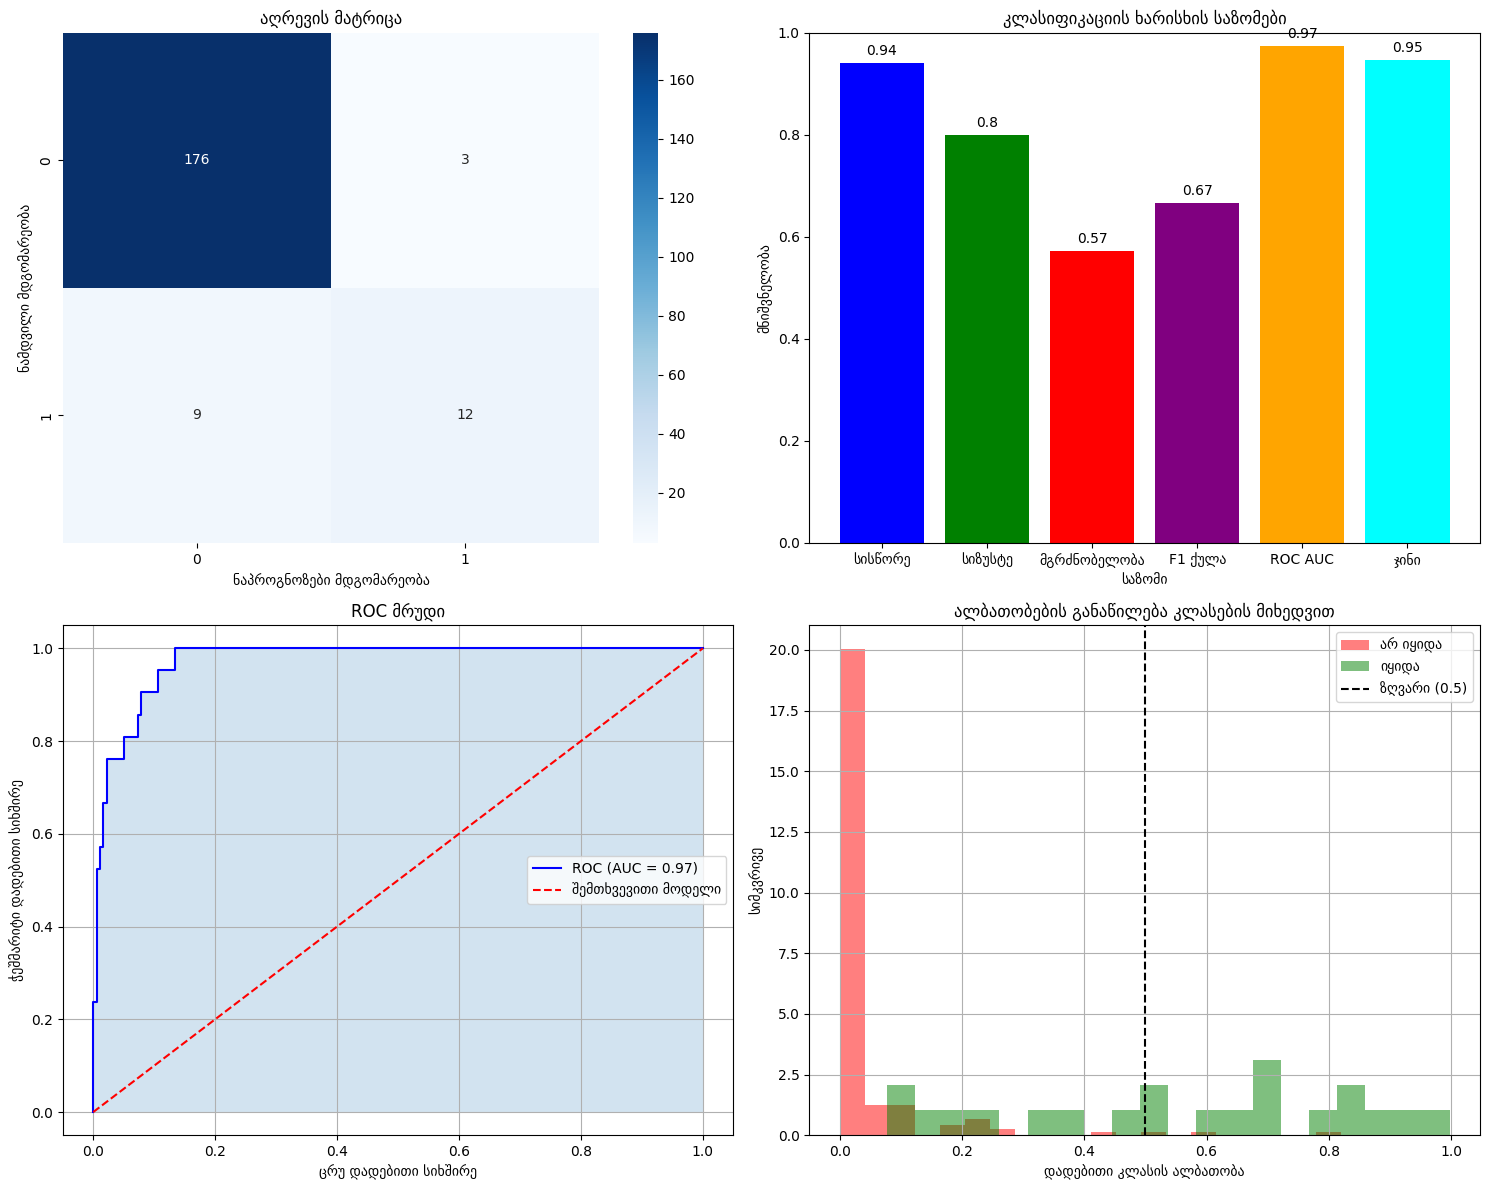

In [ ]:
# დაასრულეთ კოდი

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve

# დიაგრამები
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# აღრევის მატრიცა
cm =confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[0, 0])
axs[0, 0].set_xlabel('ნაპროგნოზები მდგომარეობა')
axs[0, 0].set_ylabel('ნამდვილი მდგომარეობა')
axs[0, 0].set_title('აღრევის მატრიცა')

# საზომები
metrics = ['სისწორე', 'სიზუსტე', 'მგრძნობელობა', 'F1 ქულა', 'ROC AUC', 'ჯინი']
values =[accuracy, precision, recall, f1, roc_auc, gini_coefficient]

bars = axs[0, 1].bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
axs[0, 1].set_ylim(0, 1)
axs[0, 1].set_xlabel('საზომი')
axs[0, 1].set_ylabel('მნიშვნელობა')
axs[0, 1].set_title('კლასიფიკაციის ხარისხის საზომები')

# ყოველ სვეტზე მნიშვნელობის დამატება
for bar in bars:
    yval = bar.get_height()
    axs[0, 1].text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

# ROC მრუდი
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
axs[1, 0].plot(fpr, tpr, 'b-', label=f'ROC (AUC = {roc_auc:.2f})')
axs[1, 0].plot([0, 1], [0, 1], 'r--', label='შემთხვევითი მოდელი')
axs[1, 0].set_xlabel('ცრუ დადებითი სიხშირე')
axs[1, 0].set_ylabel('ჭეშმარიტი დადებითი სიხშირე')
axs[1, 0].set_title('ROC მრუდი')
axs[1, 0].legend()
axs[1, 0].fill_between(fpr, tpr, alpha=0.2)
axs[1, 0].grid(True)

# ხდომილებათა ალბათობის სიმკვრივის ფუნქციები

# გადაწყვეტილების მიჯნა
cutoff = 0.5

pos_probs = y_pred_prob[y_test == 1]
neg_probs = y_pred_prob[y_test == 0]

axs[1, 1].hist(neg_probs, bins=20, alpha=0.5, color='red',
               density=True, label='არ იყიდა')
axs[1, 1].hist(pos_probs, bins=20, alpha=0.5, color='green',
               density=True, label='იყიდა')
axs[1, 1].axvline(x=cutoff, color='black', linestyle='--',
                  label=f'ზღვარი ({cutoff})')
axs[1, 1].set_xlabel('დადებითი კლასის ალბათობა')
axs[1, 1].set_ylabel('სიმკვრივე')
axs[1, 1].set_title('ალბათობების განაწილება კლასების მიხედვით')
axs[1, 1].legend()
axs[1, 1].grid(True)

# მრუდების ქვეშ სივრცის გაფერადება

plt.tight_layout()
plt.show()